#  Introdução

A extração de dados do Twitter pode ser uma ferramenta valiosa para as empresas públicas que buscam compreender melhor o sentimento e as necessidades dos cidadãos. Com bilhões de tweets sendo publicados diariamente, o Twitter oferece uma riqueza de informações que as empresas públicas podem usar para melhorar a visão e o objetivo da empresa para a sociedade.


Importando as Bibliotecas necessárias para a extração dos dados, tratamento dos dados, análise dos dados e treinamento de modelos

In [68]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import tweepy
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
#from google.colab                    import drive
from nltk.corpus                     import stopwords
nltk.download('punkt')
from nltk.tokenize                   import word_tokenize
import nltk
nltk.download('vader_lexicon')
from collections import Counter
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Chave de acesso para extração de dados via API do Twitter


In [72]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [73]:
df2 = pd.DataFrame(columns=['ID', 'text'])

Método usado para extração dos dados do Twitter

In [74]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='eletrobras', 
                              max_results=100).flatten(limit=2000)

In [75]:
analysis = None

In [76]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  
  df2.loc[count] = [tweet.id]+[tweet.text]
  
  count += 1

In [77]:
df2.head(100)

,ID,text
0,1650289032478195714,Eletrobras is the giant of the Brazilian elect...
1,1650288735785824256,"The Eletrobras is big , It is Great , It is fr..."
2,1650288543258771458,renationalize Eletrobras and Petrobras for yes...
3,1650288162302840833,"Absurd what happened 🤬 yes, take back control ..."
4,1650287640338477057,Tem que reverter a privatização da Eletrobrás SIM
...,...,...
95,1650246933301084161,RT @requiaooficial: Janja entrou numa loja em ...
96,1650246231489228800,RT @EdsonFilho74: ESTOU COM JANJA!\nPorquê ela...
97,1650245741808328705,RT @requiaooficial: Janja entrou numa loja em ...
98,1650244063231111168,RT @requiaooficial: Janja entrou numa loja em ...


Expressão regular para remover toda a pontuação

In [78]:
# Essa expressão regular remove toda a pontuação
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

Expressão Regular para remoção de palavras com números e colocar as palavras em minúsculas

In [79]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

Tokenização

In [80]:
#faz uso do nltk.download('punkt')
#from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

,ID,text,tokens
0,1650289032478195714,eletrobras is the giant of the brazilian elect...,"[eletrobras, is, the, giant, of, the, brazilia..."
1,1650288735785824256,the eletrobras is big it is great it is fr...,"[the, eletrobras, is, big, it, is, great, it, ..."
2,1650288543258771458,renationalize eletrobras and petrobras for yes...,"[renationalize, eletrobras, and, petrobras, fo..."
3,1650288162302840833,absurd what happened 🤬 yes take back control ...,"[absurd, what, happened, 🤬, yes, take, back, c..."
4,1650287640338477057,tem que reverter a privatização da eletrobrás sim,"[tem, que, reverter, a, privatização, da, elet..."


# Análise de Sentimento

A análise de sentimento é importante para rotularmos as saídas dos textos extraídos de nossa base de dados. Para tal função , usamos uma biblioteca de processamento de linguagem natural chamada NLTK (Natural Language Toolkit), importando ferramentas para a possibilidade de análise.

In [81]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [82]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [83]:
from nltk.tokenize import TweetTokenizer


In [84]:
sia = SentimentIntensityAnalyzer()

In [85]:
def analisar_sentimento2(texto):
    tokens = TweetTokenizer(texto)
    score = sia.polarity_scores(texto)
    return score['compound']


In [86]:
df2['Pontuacao2'] = df2['text'].apply(analisar_sentimento2)

In [87]:
df2.head(16)

,ID,text,tokens,Pontuacao2
0,1650289032478195714,eletrobras is the giant of the brazilian elect...,"[eletrobras, is, the, giant, of, the, brazilia...",0.5574
1,1650288735785824256,the eletrobras is big it is great it is fr...,"[the, eletrobras, is, big, it, is, great, it, ...",0.6249
2,1650288543258771458,renationalize eletrobras and petrobras for yes...,"[renationalize, eletrobras, and, petrobras, fo...",0.4215
3,1650288162302840833,absurd what happened 🤬 yes take back control ...,"[absurd, what, happened, 🤬, yes, take, back, c...",0.4019
4,1650287640338477057,tem que reverter a privatização da eletrobrás sim,"[tem, que, reverter, a, privatização, da, elet...",0.0000
5,1650287585250406402,rt jornaldacultura bercovici falta vonta...,"[rt, jornaldacultura, bercovici, falta, vontad...",0.0000
6,1650287348582608896,rt estou com janja \nporquê ela é filiada ...,"[rt, estou, com, janja, porquê, ela, é, filiad...",0.0000
7,1650286803545358338,i completed years inside eletrobras furnas,"[i, completed, years, inside, eletrobras, furnas]",0.0000
8,1650286674029445127,i love eletrobras furnas,"[i, love, eletrobras, furnas]",0.6369
9,1650286588515983360,with increased rainfall brazil reduced the hy...,"[with, increased, rainfall, brazil, reduced, t...",0.4767


Função para rotular os resultados obtidos pela Pontuação

In [88]:
# Define uma função de mapeamento
def mapear_valor(valor):
    if valor > 0:
        return 'Positivo'
    elif valor < 0:
        return 'Negativo'
    else:
        return 'Neutro'


In [89]:
df2['Pontuacao2'] = df2['Pontuacao2'].astype(float)

In [90]:
df2.head()

,ID,text,tokens,Pontuacao2
0,1650289032478195714,eletrobras is the giant of the brazilian elect...,"[eletrobras, is, the, giant, of, the, brazilia...",0.5574
1,1650288735785824256,the eletrobras is big it is great it is fr...,"[the, eletrobras, is, big, it, is, great, it, ...",0.6249
2,1650288543258771458,renationalize eletrobras and petrobras for yes...,"[renationalize, eletrobras, and, petrobras, fo...",0.4215
3,1650288162302840833,absurd what happened 🤬 yes take back control ...,"[absurd, what, happened, 🤬, yes, take, back, c...",0.4019
4,1650287640338477057,tem que reverter a privatização da eletrobrás sim,"[tem, que, reverter, a, privatização, da, elet...",0.0000


In [91]:
df2['rotulos'] = df2['Pontuacao2'].apply(mapear_valor)

In [92]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1650289032478195714,eletrobras is the giant of the brazilian elect...,"[eletrobras, is, the, giant, of, the, brazilia...",0.5574,Positivo
1,1650288735785824256,the eletrobras is big it is great it is fr...,"[the, eletrobras, is, big, it, is, great, it, ...",0.6249,Positivo
2,1650288543258771458,renationalize eletrobras and petrobras for yes...,"[renationalize, eletrobras, and, petrobras, fo...",0.4215,Positivo
3,1650288162302840833,absurd what happened 🤬 yes take back control ...,"[absurd, what, happened, 🤬, yes, take, back, c...",0.4019,Positivo
4,1650287640338477057,tem que reverter a privatização da eletrobrás sim,"[tem, que, reverter, a, privatização, da, elet...",0.0000,Neutro


In [93]:
df2.iloc[4]

ID                                          1650287640338477057
text          tem que reverter a privatização da eletrobrás sim
tokens        [tem, que, reverter, a, privatização, da, elet...
Pontuacao2                                                  0.0
rotulos                                                  Neutro
Name: 4, dtype: object

In [94]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1650289032478195714,eletrobras is the giant of the brazilian elect...,"[eletrobras, is, the, giant, of, the, brazilia...",0.5574,Positivo
1,1650288735785824256,the eletrobras is big it is great it is fr...,"[the, eletrobras, is, big, it, is, great, it, ...",0.6249,Positivo
2,1650288543258771458,renationalize eletrobras and petrobras for yes...,"[renationalize, eletrobras, and, petrobras, fo...",0.4215,Positivo
3,1650288162302840833,absurd what happened 🤬 yes take back control ...,"[absurd, what, happened, 🤬, yes, take, back, c...",0.4019,Positivo
4,1650287640338477057,tem que reverter a privatização da eletrobrás sim,"[tem, que, reverter, a, privatização, da, elet...",0.0000,Neutro


In [95]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['eletrobras',
 'is',
 'the',
 'giant',
 'of',
 'the',
 'brazilian',
 'electricity',
 'sector',
 'fantastic']

In [96]:
# Estas são as etapas para encontrar as palavras mais comuns

#from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(3380, 'a'),
 (3045, 'para'),
 (1861, 'rt'),
 (1728, 'o'),
 (1580, 'não'),
 (1549, 'foi'),
 (1548, 'em'),
 (1537, 'janja'),
 (1527, 'uma'),
 (1524, 'requiaooficial')]

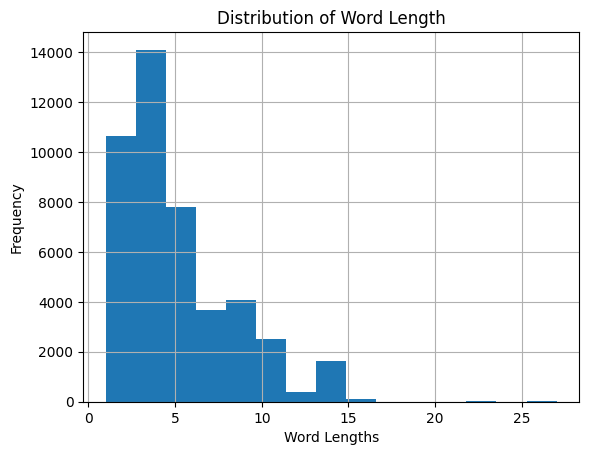

In [97]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [98]:
word_counts[:10]

[(3380, 'a'),
 (3045, 'para'),
 (1861, 'rt'),
 (1728, 'o'),
 (1580, 'não'),
 (1549, 'foi'),
 (1548, 'em'),
 (1537, 'janja'),
 (1527, 'uma'),
 (1524, 'requiaooficial')]

Uso de Stopwords para extração de palavras úteis na Wordcloud

In [99]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')
stop_words.append('a')
stop_words.append('e')
stop_words.append('o')
stop_words.append('de')
stop_words.append('com')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop
0,1650289032478195714,eletrobras is the giant of the brazilian elect...,"[eletrobras, is, the, giant, of, the, brazilia...",0.5574,Positivo,"[eletrobras, is, the, giant, of, the, brazilia..."
1,1650288735785824256,the eletrobras is big it is great it is fr...,"[the, eletrobras, is, big, it, is, great, it, ...",0.6249,Positivo,"[the, eletrobras, is, big, it, is, great, it, ..."
2,1650288543258771458,renationalize eletrobras and petrobras for yes...,"[renationalize, eletrobras, and, petrobras, fo...",0.4215,Positivo,"[renationalize, eletrobras, and, petrobras, ye..."
3,1650288162302840833,absurd what happened 🤬 yes take back control ...,"[absurd, what, happened, 🤬, yes, take, back, c...",0.4019,Positivo,"[absurd, what, happened, 🤬, yes, take, back, c..."
4,1650287640338477057,tem que reverter a privatização da eletrobrás sim,"[tem, que, reverter, a, privatização, da, elet...",0.0000,Neutro,"[reverter, privatização, eletrobrás, sim]"


In [100]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [101]:
word_list_stop[:10]

['eletrobras',
 'is',
 'the',
 'giant',
 'of',
 'the',
 'brazilian',
 'electricity',
 'sector',
 'fantastic']

In [102]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop,tokens_pos
0,1650289032478195714,eletrobras is the giant of the brazilian elect...,"[eletrobras, is, the, giant, of, the, brazilia...",0.5574,Positivo,"[eletrobras, is, the, giant, of, the, brazilia...","[(eletrobras, NN), (is, VBZ), (the, DT), (gian..."
1,1650288735785824256,the eletrobras is big it is great it is fr...,"[the, eletrobras, is, big, it, is, great, it, ...",0.6249,Positivo,"[the, eletrobras, is, big, it, is, great, it, ...","[(the, DT), (eletrobras, NN), (is, VBZ), (big,..."
2,1650288543258771458,renationalize eletrobras and petrobras for yes...,"[renationalize, eletrobras, and, petrobras, fo...",0.4215,Positivo,"[renationalize, eletrobras, and, petrobras, ye...","[(renationalize, VB), (eletrobras, NNS), (and,..."
3,1650288162302840833,absurd what happened 🤬 yes take back control ...,"[absurd, what, happened, 🤬, yes, take, back, c...",0.4019,Positivo,"[absurd, what, happened, 🤬, yes, take, back, c...","[(absurd, VB), (what, WP), (happened, VBD), (🤬..."
4,1650287640338477057,tem que reverter a privatização da eletrobrás sim,"[tem, que, reverter, a, privatização, da, elet...",0.0000,Neutro,"[reverter, privatização, eletrobrás, sim]","[(reverter, NN), (privatização, NN), (eletrobr..."


In [103]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(1537, 'janja'),
 (1524, 'requiaooficial'),
 (1523, 'petrobras'),
 (1508, 'portugal'),
 (1507, 'vender'),
 (1505, 'comprar'),
 (1504, 'marido'),
 (1503, 'loja'),
 (1503, 'gravata'),
 (1502, 'entrou')]

# Nuvem de Palavras 

Wordcloud – em português, nuvem de palavras ou nuvem de tags – é um tipo de visualização de dados muito poderoso e ferramenta de Data Science usado quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

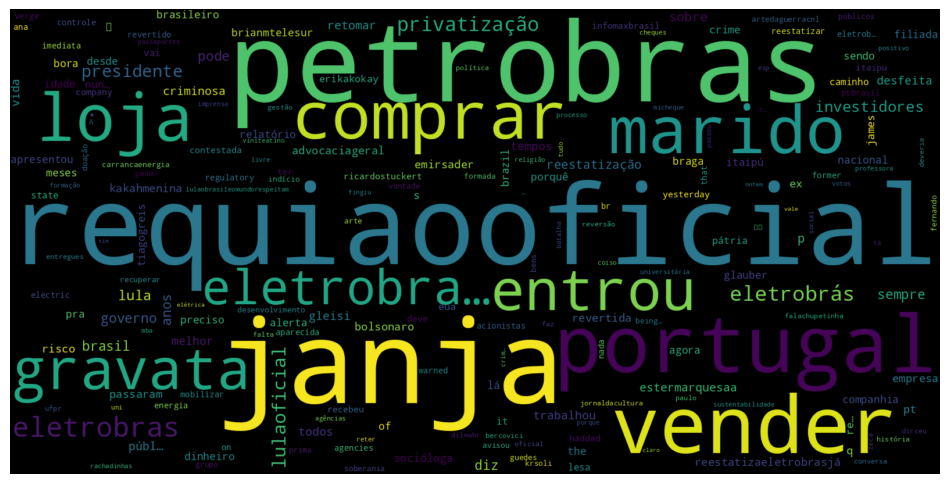

In [104]:
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Extração de dados em um excel

In [105]:
file_name = 'Basededados_twitter_eletrobras.xlsx'
df2.to_excel(file_name)

# Modelagem

Foram gerados 4 modelos de classificação:

- Multinomial Naive Bayes
- Multnomial usando Bigrams
- Random Forest
- Support Vector Machine

## Multinomial Naive Bayes

Separação de bases de treinamento e base de testes

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['rotulos'], test_size=0.2)

In [107]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)



In [108]:
# criar modelo multinomial
mnb = MultinomialNB()

# treinar o modelo multinomial
mnb.fit(X_train_vectors, y_train)


MultinomialNB()

In [109]:
# fazer previsões no conjunto de teste
y_pred_mnb = mnb.predict(X_test_vectors)

# imprimir relatório de classificação
print(classification_report(y_test, y_pred_mnb))


              precision    recall  f1-score   support

    Negativo       0.41      0.93      0.57        15
      Neutro       1.00      0.93      0.96       382
    Positivo       0.00      0.00      0.00         3

    accuracy                           0.92       400
   macro avg       0.47      0.62      0.51       400
weighted avg       0.97      0.92      0.94       400



In [110]:
metrics.accuracy_score(y_test, y_pred_mnb)

0.92

In [111]:
print(pd.crosstab(y_test, y_pred_mnb, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        14       0         1   15
Neutro          18     354        10  382
Positivo         2       1         0    3
All             34     355        11  400


## Multinomial usando Bigramas

In [112]:
#usando melhoria com Bigrams
vectorizer = CountVectorizer(ngram_range = (1, 2),analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

X_train_mnb2_vectors = vectorizer.fit_transform(X_train)
X_test_mnb2_vectors = vectorizer.transform(X_test)

modelo = MultinomialNB()
# treinar o modelo multinomial
modelo.fit(X_train_mnb2_vectors, y_train)


MultinomialNB()

In [113]:
# fazer previsões no conjunto de teste
y_pred_mnb2 = modelo.predict(X_test_mnb2_vectors)

# imprimir relatório de classificação
print(classification_report(y_test, y_pred_mnb2))

              precision    recall  f1-score   support

    Negativo       0.42      0.87      0.57        15
      Neutro       1.00      0.92      0.95       382
    Positivo       0.00      0.00      0.00         3

    accuracy                           0.91       400
   macro avg       0.47      0.59      0.51       400
weighted avg       0.97      0.91      0.93       400



In [114]:
metrics.accuracy_score(y_test, y_pred_mnb2)

0.9075

In [115]:
print(pd.crosstab(y_test, y_pred_mnb2, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        13       0         2   15
Neutro          16     350        16  382
Positivo         2       1         0    3
All             31     351        18  400


## Modelo Randow Forest

In [116]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [117]:
train_data_features = vectorizer.fit_transform(X_train)
train_data_features

<1600x1289 sparse matrix of type '<class 'numpy.int64'>'
	with 18057 stored elements in Compressed Sparse Row format>

In [118]:
forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier()

In [119]:
class_sentimentos = y_train.values
class_sentimentos

array(['Neutro', 'Neutro', 'Neutro', ..., 'Neutro', 'Neutro', 'Negativo'],
      dtype=object)

In [120]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier()

In [121]:
test_data_features_resultados = vectorizer.transform(X_test)
test_data_features_resultados

<400x1289 sparse matrix of type '<class 'numpy.int64'>'
	with 4323 stored elements in Compressed Sparse Row format>

In [122]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', '

In [123]:
metrics.accuracy_score(y_test, resultados)

0.9825

In [124]:
print(metrics.classification_report(y_test, resultados))

              precision    recall  f1-score   support

    Negativo       1.00      0.73      0.85        15
      Neutro       0.98      1.00      0.99       382
    Positivo       0.00      0.00      0.00         3

    accuracy                           0.98       400
   macro avg       0.66      0.58      0.61       400
weighted avg       0.98      0.98      0.98       400



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
print(pd.crosstab(y_test, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  All
Real                           
Negativo        11       4   15
Neutro           0     382  382
Positivo         0       3    3
All             11     389  400


## Support Vector Machine (SVM)

In [126]:
#vectorizer = TfidfVectorizer( max_features=5000)
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [127]:
X_train_svm_vectors = vectorizer.fit_transform(X_train)
X_test_svm_vectors = vectorizer.transform(X_test)

In [128]:
# criar modelo SVM
svm = SVC(kernel='linear')
# treinar o modelo SVM
svm.fit(X_train_svm_vectors, y_train)

SVC(kernel='linear')

In [129]:
# fazer previsões no conjunto de teste
y_pred_svm = svm.predict(X_test_svm_vectors)

# imprimir relatório de classificação
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    Negativo       1.00      0.73      0.85        15
      Neutro       0.99      1.00      0.99       382
    Positivo       1.00      0.67      0.80         3

    accuracy                           0.99       400
   macro avg       1.00      0.80      0.88       400
weighted avg       0.99      0.99      0.99       400



In [130]:
print(pd.crosstab(y_test, y_pred_svm, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        11       4         0   15
Neutro           0     382         0  382
Positivo         0       1         2    3
All             11     387         2  400


In [131]:
metrics.accuracy_score(y_test, y_pred_svm)

0.9875